# plot to display percent prevalence by marker size:

The size of each scatter point/marker indicates/scales with the prevalence/percentage of how often a phenotype (defined by variable x and y) occurs. 

This code should be robust to any # of variables that is supplied as long as the incoming data is in the following order of columns:

##### x axis points, y axis points, variable 1, variable 2, variable 3, etc

In [1]:
# import libraries and load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms


# sample data
df = pd.DataFrame([[2.0, 1.0, 1.1, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 0.0, 1.0, 0.0, 2.4, 5.3], [2.0, 4.0, 92.6, 58.3, 38.2, 52.0, 70.2], [2.0, 5.0, 1.1, 9.4, 19.1, 17.1, 14.0], [2.0, 6.0, 1.1, 5.2, 8.2, 7.3, 1.8], [2.0, 7.0, 0.0, 4.2, 2.7, 2.4, 0.0], [2.0, 8.0, 0.0, 1.0, 2.7, 0.8, 1.8], [2.0, 9.0, 0.0, 1.0, 1.8, 1.6, 0.0], [2.0, 10.0, 0.0, 1.0, 1.8, 0.0, 0.0], [2.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 12.0, 0.0, 0.0, 0.0, 1.6, 0.0], [3.0, 4.0, 0.0, 0.0, 0.0, 0.8, 0.0], [3.0, 5.0, 0.0, 1.0, 0.9, 0.0, 0.0], [3.0, 6.0, 2.1, 1.0, 0.0, 1.6, 3.5], [3.0, 7.0, 0.0, 1.0, 3.6, 0.8, 0.0], [3.0, 8.0, 0.0, 3.1, 9.1, 2.4, 0.0], [3.0, 9.0, 0.0, 2.1, 2.7, 1.6, 0.0], [3.0, 10.0, 0.0, 0.0, 1.8, 1.6, 0.0], [3.0, 11.0, 0.0, 0.0, 2.7, 0.0, 0.0], [3.0, 12.0, 0.0, 0.0, 0.9, 0.0, 0.0], [3.0, 13.0, 0.0, 0.0, 0.0, 0.8, 0.0], [3.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.8], [4.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0], [4.0, 8.0, 1.1, 4.2, 0.9, 1.6, 0.0], [4.0, 9.0, 0.0, 3.1, 0.0, 0.0, 0.0], [4.0, 10.0, 0.0, 1.0, 0.9, 0.0, 1.8], [4.0, 11.0, 0.0, 0.0, 0.9, 0.8, 0.0], [4.0, 12.0, 0.0, 1.0, 0.0, 0.0, 0.0], [5.0, 13.0, 0.0, 0.0, 0.0, 0.8, 0.0], [5.0, 16.0, 0.0, 0.0, 0.0, 0.8, 0.0], [6.0, 10.0, 0.0, 0.0, 0.0, 0.8, 0.0], [6.0, 12.0, 1.1, 0.0, 0.9, 0.0, 0.0]])
# df = pd.read_csv('data.csv')
# df = df.round(1)
df.columns = ['pole#', 'centriole#', 'gene1', 'gene2', 'gene3', 'gene4', 'gene5']
        
x = df.iloc[:,0] 
y = df.iloc[:,1]

# drop the x and y columns from df
df = df.iloc[:,2:]
print("x-axis: " ,x.name," \n",
      x[:5],"\n\n",
      "y-axis: ", y.name, " \n",
      y[:5],
      "dataframe of variables(genes) \n\n",
      df.head(5))

x-axis:  pole#  
 0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: pole#, dtype: float64 

 y-axis:  centriole#  
 0    1.0
1    3.0
2    4.0
3    5.0
4    6.0
Name: centriole#, dtype: float64 dataframe of variables(genes) 

    gene1  gene2  gene3  gene4  gene5
0    1.1    0.0    0.0    0.0    0.0
1    0.0    1.0    0.0    2.4    5.3
2   92.6   58.3   38.2   52.0   70.2
3    1.1    9.4   19.1   17.1   14.0
4    1.1    5.2    8.2    7.3    1.8


# setup scaled translation and create fixed variables
to fit multiple variables (genes) at the same coordinate, the marker variables must be offset to prevent overlap.

#### offset: 
translates the data in x and y

#### trans:  
calls to the current figure and transforms the data to the display coordinate system.

#### offset_range and x_offset_values: 
creates a range of digits that fit within positions ranging from y-coordinates -60 to 60 (a total of 120 points in a vector), based on the # of variables/genes you have.

#### variables to adjust:
plt.fiture(figsze = ) = controls figure size

siztr = sets a fixed marker size to all points that will be scaled according to % prevalence

colors = list of colors for each variable/gene, in order of df

offset_range and x_offset_values = adjust the range of y-coordinates you span depending on the total # of variables/genes you are plotting.

plt labels (axes and title)

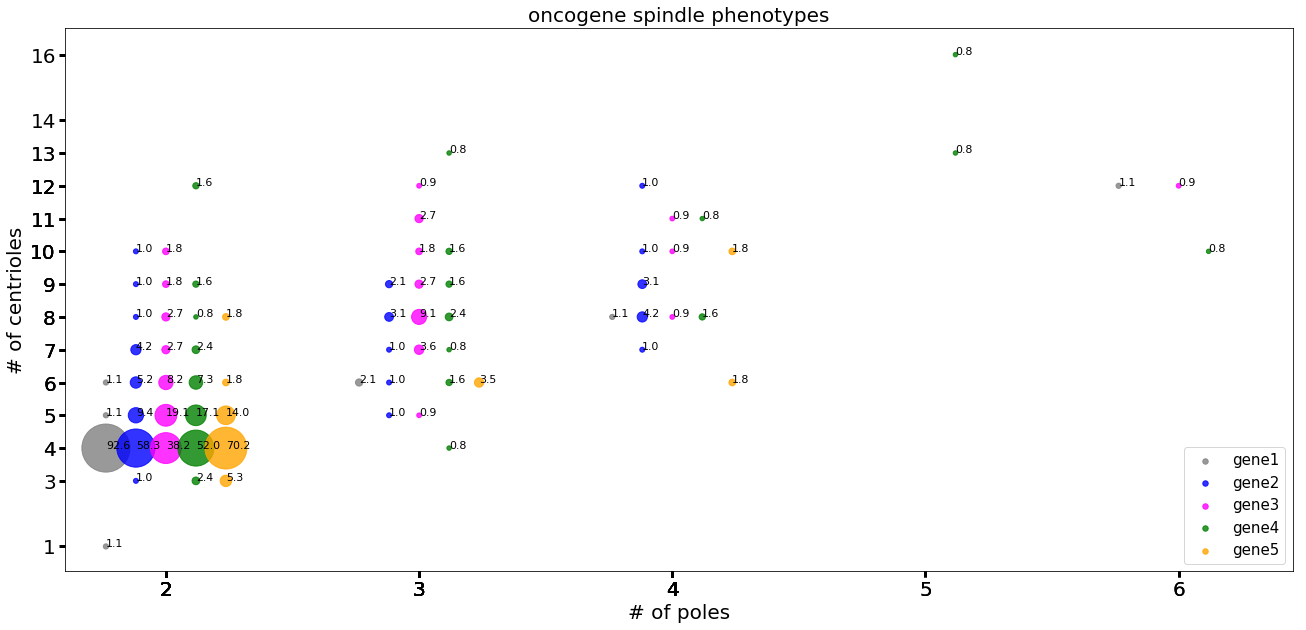

In [2]:
plt.figure(figsize=(22, 10))
sizetr = 25 # marker size
colors = ['gray', 'blue', 'magenta','green','orange'] # color list in order of variables


# transforms.ScaledTranslation(x-term,y-term, calls to current figure,
# and specifies to first scale xt and yt specified in points to display space before doing the final offset.
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

# offset_range: creates a range of digits that fit within positions ranging from y-coordinates -60 to 60 (a total of 120 points in a vector).
offset_range = int(120/(len(df.columns)-1))
x_offset_values = range(-60,61, offset_range) # 

for (i, x_offset) in zip(range(len(df.columns)), x_offset_values):
    plt.scatter(x, y, c = colors[i], label = str(df.columns[i]), s = df.iloc[:,i]*sizetr, transform=trans+offset(x_offset), alpha = 0.8)
    for row in range(len(df.iloc[:,i])):
        x1 = x[row]
        y1 = y[row]
        if df.iloc[row][i] != 0:
            plt.text(x1,y1, df.iloc[row][i], fontsize= 11, transform=trans+offset(x_offset))
        else:
            continue
            
            
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 20, width = 3, length = 6)

plt.xticks(x)
plt.yticks(y)

plt.xlabel("# of poles", fontsize = 20);
plt.ylabel("# of centrioles", fontsize = 20); 
plt.title("oncogene spindle phenotypes", fontsize = 20)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=15)
for column in range(len(df.columns)):
    lgnd.legendHandles[column]._sizes = [30]

plt.show()
